<a href="https://colab.research.google.com/github/nanmaharaj/my-deeplearning-projects/blob/main/CNN_MNIST_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [32]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
#Normalisation
X_train=X_train/255
X_test=X_test/255

In [34]:
len(X_train), len(X_test)

(60000, 10000)

In [35]:
X_train[0].shape, X_train[0]

((28, 28),
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,


(<matplotlib.image.AxesImage at 0x7eec32fd1b10>, 5)

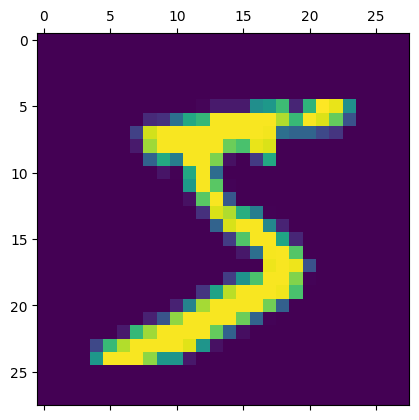

In [36]:
plt.matshow(X_train[0]),y_train[0]

In [37]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [38]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1446 - accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0483 - accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0339 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0261 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0087 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 49s 26m

In [43]:
cnn.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]

313/313 [==============================] - 5s 15ms/step


In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

print("Classification Report: \n",classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.93      0.90      0.91      1010
           4       0.95      0.92      0.93       982
           5       0.89      0.89      0.89       892
           6       0.95      0.94      0.94       958
           7       0.95      0.91      0.93      1028
           8       0.87      0.90      0.88       974
           9       0.89      0.93      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.92     10000



Text(95.72222222222221, 0.5, 'Truth')

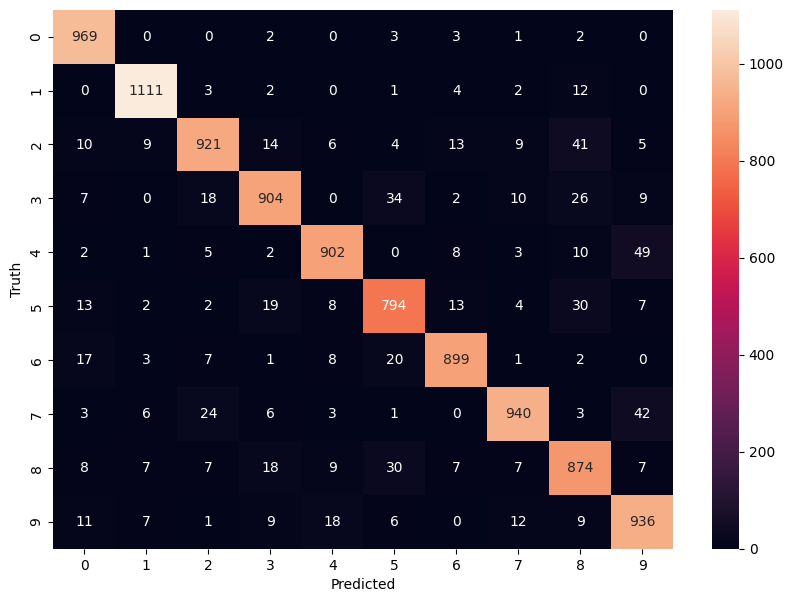

In [45]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')